<a href="https://colab.research.google.com/github/abriyanyusuf/C23PS423_ML/blob/main/TrainObjDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
This notebook aimed to create feature of object detection using TensorFlow. We want to create object detection feature using custom dataset.

Created by : CS42-PS423 Team 

#Create Dataset : Gathering and Labelling Training Images (Optional)
We will use this data set [ECUS TFD dataset](https://github.com/Liang-yc/ECUSTFD-resized-) that contain 19 types of food collected from different angle. 
There are \: 
1. Apple 296 Images
2. banana 178 Images
3. bread 66 Images
4. bun 90 Images
5. doughnut 210 Images
6. egg 104 Images
7. fired dough twist 124 Images
8. grape 58 Images
9. lemon 148 Images
10. litchi 78 Images
11. mango 220 Images
12. mooncake 134 Images
13. orange 254 Images
14. peach 126 Images
15. pear 166 Images
16. plum 176 Images
17. qiwi 120 Images
18. sachima 150 Images
19. tomato 172 Images
20. Mix fruit 108 Images

Total Images \: 2978 Images

Note : there is also labels for "coin" inside each XML file we will have defined this labels also in the next section or we will encountered error

We able to add new categories of food by using [LabelImg](https://github.com/heartexlabs/labelImg). We can use this code below to collect images from web cam if we want. It will automatically capture images from web came in certain time that we desired before

##1. Import Dependencies

In [ ]:
##Import cv2
import cv2
#Import UUID
import uuid
#Import Time
import time
##Import OS
import os

##2. Define Initial Parameter

In [ ]:
##Define Images to Collect
labels = ['label1', 'label2']
number_images = 10 ##Put number images per label that we want capture

##3. Setup Folder to Save Collected Images

In [ ]:
##Define images path 
%cd '/mydrive'
IMAGES_PATH = os.path.join('Tensorflow', 'collectedimages')

In [ ]:
##Create folder it not exist
if not os.path.exists(IMAGES_PATH):
  if os.name == 'posix':
    !mkdir -p {IMAGES_PATH}
  if os.name == 'nt':
    !mkdir {IMAGES_PATH}

##Create folder based on label
for label in labels:
  path = os.path.join(IMAGES_PATH, label)
  if not os.path.exists(path):
    !mkdir {path}

##4. Capture Images Using Webcam

In [ ]:
for label in labels:
    cap = cv2.VideoCapture(0)
    print('Collecting images for {}'.format(label))
    ##give a delay before start capturing
    time.sleep(5)
    ##kita akan mengambil 5 gambar untuk masing-masing label
    for imgnum in range(number_imgs):
        print('Collecting image {}'.format(imgnum))
        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH,label,label+'.'+'{}.jpg'.format(str(uuid.uuid1())))
        cv2.imwrite(imgname, frame)
        cv2.imshow('frame', frame)
        #give delay to each capturing process eg image 0 to image 1 etc
        time.sleep(2)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

##5. Labelling Image Using LabelImg

In [ ]:
##Setup directory folder
LABELIMG_PATH = os.path.join('Tensorflow', 'labelimg')

In [ ]:
##Cloning LabelImg from github
if not os.path.exists(LABELIMG_PATH):
    !mkdir {LABELIMG_PATH}
    !git clone https://github.com/tzutalin/labelImg {LABELIMG_PATH}

In [ ]:
##Installing LabelIMG
if os.name == 'posix':
    !make qt5py3
if os.name =='nt':
    !cd {LABELIMG_PATH} && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
##Open labelImg
!cd {LABELIMG_PATH} && python labelImg.py

We can start labelling by choosing image in collected folder. The XML file will created automatically inside each folder. After that we have to move all files from labelled folder to 1 folder. Finally we have to compress that folder as a zip. And now we ready to upload .zip file that we have created before as a dataset. We will upload .zip file to our google drive

#Install Dependencies for TensorFlow Object Detection

We will clone repository from TensorFlow github to use TensorFlow Object Detection [TensorFlow model repository](https://github.com/tensorflow/models)

In [ ]:
%cd /content

/content


In [ ]:
# Clone the tensorflow models repository from GitHub
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3843, done.
remote: Counting objects: 100% (3843/3843), done.
remote: Compressing objects: 100% (2955/2955), done.
remote: Total 3843 (delta 1109), reused 1946 (delta 837), pack-reused 0
Receiving objects: 100% (3843/3843), 49.59 MiB | 34.43 MiB/s, done.
Resolving deltas: 100% (1109/1109), done.


In [ ]:
# Copy setup files into models/research folder
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
#cp object_detection/packages/tf2/setup.py .

In [ ]:
# Modify setup.py file to install the tf-models-official repository targeted at TF v2.8.0
import re
with open('/content/models/research/object_detection/packages/tf2/setup.py') as f:
    s = f.read()

with open('/content/models/research/setup.py', 'w') as f:
    # Set fine_tune_checkpoint path
    s = re.sub('tf-models-official>=2.5.1',
               'tf-models-official==2.8.0', s)
    f.write(s)

In [ ]:
# Install the Object Detection API
!pip install /content/models/research/

# Need to downgrade to TF v2.8.0 due to Colab compatibility bug with TF v2.10 (as of 10/03/22)
!pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 88.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 91.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 19.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.2 MB/s eta 0:00:00
  Preparing m

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 43.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.1
    Uninstalling tensorflow-2.8.1:
      Successfully uninstalled tensorflow-2.8.1


In [ ]:
# Run Model Bulider Test file, just to verify everything's working properly
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py


/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutexC1Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKernelContextESt8functionIFN3tsl8StatusOrISt10u

#3. Upload Image Dataset and Prepare Training Data

##3.1. Mounting Google Drive and Copy zip file

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


We will copy our dataset from gdrive

In [ ]:
!cp '/content/gdrive/MyDrive/Capstone Project Machine Learning/ECUSTFD.zip' '/content'

##3.2. Split Images Into Train, Validation, and Test Folders

We will create directory for train, test, and validation and unzip the dataset and put the result to desired directory

In [ ]:
#Run this code if we faced error, it will remove all the changes and start from the beginning
#%cd /content

In [ ]:
#!rm -rf images

Start create directory 

In [ ]:
%cd ..

/


In [ ]:
!mkdir /content/images
!mkdir /content/images/train; mkdir /content/images/validation; mkdir /content/images/test

In [ ]:
%cd /content

/content


In [ ]:
!unzip -q ECUSTFD.zip -d /content/images/all

We will move 80% of the images to the tran folder, 10% to validation and 10% to the test folder. In this code we will use several library \: 

1. The Python Glob module searches all path names looking for files matching a specified pattern according to the rules dictated by the Unix shell.

2. Pathlib is a native Python library for handling files and paths on your operating system. It offers a bunch of path methods and attributes that make handling files more convenient than using the os module.

3. The random module in Python defines a series of functions for generating or manipulating random integers. The import random loads the random module, which contains a number of random number generation-related functions.

4. Python os system function allows us to run a command in the Python script



```
import glob
from pathlib import Path
import random
import os


# Define paths to image folders
image_path = '/content/images/all/ECUSTFD/ImagesWithXml'
train_path = '/content/images/train'
val_path = '/content/images/validation'
test_path = '/content/images/test'

# Get list of all images
jpg_file_list = [path for path in Path(image_path).rglob('*.jpg')]
JPG_file_list = [path for path in Path(image_path).rglob('*.JPG')]
png_file_list = [path for path in Path(image_path).rglob('*.png')]
bmp_file_list = [path for path in Path(image_path).rglob('*.bmp')]

file_list = jpg_file_list + JPG_file_list + png_file_list + bmp_file_list
file_num = len(file_list)
print('Total images: %d' % file_num)

# Determine number of files to move to each folder
train_percent = 0.8  # 80% of the files go to train
val_percent = 0.1    # 10% go to validation
test_percent = 0.1   # 10% go to test
train_num = int(file_num*train_percent)
val_num = int(file_num*val_percent)
test_num = file_num - train_num - val_num
print('Images moving to train: %d' % train_num)
print('Images moving to validation: %d' % val_num)
print('Images moving to test: %d' % test_num)

# Select 80% of files randomly and move them to train folder
for i in range(train_num):
    move_me = random.choice(file_list) #Choose randomly one file from file list
    fn = move_me.name #store file name in fn
    base_fn = move_me.stem #store file name without extension
    parent_path = move_me.parent #get root path from move_me
    xml_fn = base_fn + '.xml' #add extension xml
    os.rename(move_me, train_path+'/'+fn) #move file move_me to train folder
    #move xml from choosen file to train folder
    os.rename(os.path.join(parent_path,xml_fn),os.path.join(train_path,xml_fn))
    file_list.remove(move_me) #remove choosen file from file list to avoid it will choosen again

# Select 10% of remaining files and move them to validation folder
for i in range(val_num):
    move_me = random.choice(file_list)
    fn = move_me.name
    base_fn = move_me.stem
    parent_path = move_me.parent
    xml_fn = base_fn + '.xml'
    os.rename(move_me, val_path+'/'+fn)
    os.rename(os.path.join(parent_path,xml_fn),os.path.join(val_path,xml_fn))
    file_list.remove(move_me)

# Move remaining files to test folder
for i in range(test_num):
    move_me = random.choice(file_list)
    fn = move_me.name
    base_fn = move_me.stem
    parent_path = move_me.parent
    xml_fn = base_fn + '.xml'
    os.rename(move_me, test_path+'/'+fn)
    os.rename(os.path.join(parent_path,xml_fn),os.path.join(test_path,xml_fn))
    file_list.remove(move_me)
```



We already create .py contain code above in our repo. So we will use it by using this code below

In [ ]:
!wget https://raw.githubusercontent.com/abriyanyusuf/C23PS423_ML/main/Split_to_TrainValTest.py

--2023-05-28 06:49:41--  https://raw.githubusercontent.com/abriyanyusuf/C23PS423_ML/main/Split_to_TrainValTest.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2591 (2.5K) [text/plain]
Saving to: ‘Split_to_TrainValTest.py’

Split_to_TrainValTe 100%[===================>]   2.53K  --.-KB/s    in 0s      

2023-05-28 06:49:41 (57.9 MB/s) - ‘Split_to_TrainValTest.py’ saved [2591/2591]



We will run the code to split our data

In [ ]:
!python Split_to_TrainValTest.py

Total images: 2978
Images moving to train: 2382
Images moving to validation: 297
Images moving to test: 299


##3.3 Create Labelmap and TFRecords

We need to create labelmap for the detector and convert the images into a data file format called TFRecords, which are used by TensorFlow for training. 
What we need to do?
1. Defining a label map for our classes by creating a "labelmap.txt"
2. Convert the data into TFRecord format

In [ ]:
##Creates labelmap.txt that contain list of label below
%%bash
cat <<EOF >> /content/labelmap.txt #command to append text inside txt file
banana 
apple 
bread 
bun 
doughnut 
egg 
fired_dough_twist 
grape 
lemon 
litchi 
mango 
mooncake 
orange 
peach 
pear 
plum 
qiwi 
sachima 
tomato
coin 
EOF



We will use data conversion scripts from the GitHub. By running this code, it will create TFRecord files for the train and validation datasets, as well as a labelmap.pbtxt file which contains the label map in a different format.

In [ ]:
# Download data conversion scripts
!wget https://raw.githubusercontent.com/abriyanyusuf/C23PS423_ML/main/Create_CSV_from_VOC.py
!wget https://raw.githubusercontent.com/abriyanyusuf/C23PS423_ML/main/CSV_to_TFRecord_Converter.py

--2023-05-28 06:49:55--  https://raw.githubusercontent.com/abriyanyusuf/C23PS423_ML/main/Create_CSV_from_VOC.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1370 (1.3K) [text/plain]
Saving to: ‘Create_CSV_from_VOC.py’

Create_CSV_from_VOC 100%[===================>]   1.34K  --.-KB/s    in 0s      

2023-05-28 06:49:55 (105 MB/s) - ‘Create_CSV_from_VOC.py’ saved [1370/1370]

--2023-05-28 06:49:55--  https://raw.githubusercontent.com/abriyanyusuf/C23PS423_ML/main/CSV_to_TFRecord_Converter.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 O

In [ ]:
# Create CSV data files and TFRecord files
!python3 Create_CSV_from_VOC.py


Successfully converted xml to csv.
Successfully converted xml to csv.


In [ ]:
!python3 CSV_to_TFRecord_Converter.py --csv_input=images/train_labels.csv --labelmap=labelmap.txt --image_dir=images/train --output_path=train.tfrecord
!python3 CSV_to_TFRecord_Converter.py --csv_input=images/validation_labels.csv --labelmap=labelmap.txt --image_dir=images/validation --output_path=val.tfrecord

Successfully created the TFRecords: /content/train.tfrecord
Successfully created the TFRecords: /content/val.tfrecord


We will store the locations of the TFRecord and labelmap files as variables so we can reference them later in this Colab session

In [ ]:
train_record_fname = '/content/train.tfrecord'
val_record_fname = '/content/val.tfrecord'
label_map_pbtxt_fname = '/content/labelmap.pbtxt'

#4. Set Up Training Configuration

We will use pre-trained model from [TensorFlow 2 Object Detection Model Zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md) Each model also comes with a configuration file that points to file locations, sets training parameters (such as learning rate and total number of training steps), and more. We'll modify the configuration file for our custom training job.

1. The first section of code lists out some models availabe in the TF2 Model Zoo and defines some filenames that will be used later to download the model and config file. This makes it easy to manage which model you're using and to add other models to the list later.

2. Set the "chosen_model" variable to match the name of the model you'd like to train with. It's currently set to use the popular "ssd-mobilenet-v2-fpnlite-320" model. Click play on the next block once the chosen model has been set.

In [ ]:
# Change the chosen_model variable to deploy different models available in the TF2 object detection zoo
chosen_model = 'ssd-mobilenet-v2-fpnlite-320'

MODELS_CONFIG = {
    'ssd-mobilenet-v2': {
        'model_name': 'ssd_mobilenet_v2_320x320_coco17_tpu-8',
        'base_pipeline_file': 'ssd_mobilenet_v2_320x320_coco17_tpu-8.config',
        'pretrained_checkpoint': 'ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz',
    },
    'efficientdet-d0': {
        'model_name': 'efficientdet_d0_coco17_tpu-32',
        'base_pipeline_file': 'ssd_efficientdet_d0_512x512_coco17_tpu-8.config',
        'pretrained_checkpoint': 'efficientdet_d0_coco17_tpu-32.tar.gz',
    },
    'ssd-mobilenet-v2-fpnlite-320': {
        'model_name': 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8',
        'base_pipeline_file': 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config',
        'pretrained_checkpoint': 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz',
    },

}

model_name = MODELS_CONFIG[chosen_model]['model_name']
pretrained_checkpoint = MODELS_CONFIG[chosen_model]['pretrained_checkpoint']
base_pipeline_file = MODELS_CONFIG[chosen_model]['base_pipeline_file']

Download the pretrained model file and configuration file by clicking Play on the following section.

In [ ]:
#Run this code to delete previous change if we faced error and start from beginning
#%cd /content/models

/content


In [ ]:
#%rm -rf mymodel

In [ ]:
# Create "mymodel" folder for holding pre-trained weights and configuration files
%mkdir /content/models/mymodel/
%cd /content/models/mymodel/

# Download pre-trained model weights
import tarfile
download_tar = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/' + pretrained_checkpoint
!wget {download_tar}
tar = tarfile.open(pretrained_checkpoint)
tar.extractall()
tar.close()

# Download training configuration file for model
download_config = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/' + base_pipeline_file
!wget {download_config}

/content/models/mymodel
--2023-05-28 06:52:11--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.159.128, 2607:f8b0:4001:c58::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.159.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  19.9MB/s    in 1.0s    

2023-05-28 06:52:12 (19.9 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

--2023-05-28 06:52:12--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133,

###4.1 Modify the configuration file with hyper parameters
We will modify the pre-trained model with some parameter,
1. We will set **number_steps = 1000**
2. We will set **batch_size = 16**

We can learn more about those information regarding training configuration with TensorFlow Object Detction API best practices by access this [article ](https://neptune.ai/blog/tensorflow-object-detection-api-best-practices-to-training-evaluation-deployment)

In [ ]:
##Modify hyper parameter of the pre-trained model
num_steps = 1000
batch_size = 16

Now we will set file locations and get number of classes for config file 

In [ ]:
pipeline_fname = '/content/models/mymodel/' + base_pipeline_file
fine_tune_checkpoint = '/content/models/mymodel/' + model_name + '/checkpoint/ckpt-0'

def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())
num_classes = get_num_classes(label_map_pbtxt_fname)
print('Total classes:', num_classes)

Total classes: 20


Next, we'll rewrite the configuration file to use the training parameters we just specified. The following snippet automatically replaces the required parameters in the downloaded .config file and saves it as our custom pipeline_file.config file.

In [ ]:
# Create custom configuration file by writing the dataset, model checkpoint, and training parameters into the base pipeline file
import re

%cd /content/models/mymodel
print('writing custom configuration file')

with open(pipeline_fname) as f:
    s = f.read()
with open('pipeline_file.config', 'w') as f:
    
    # Set fine_tune_checkpoint path
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # Set tfrecord files for train and test datasets
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")', 'input_path: "{}"'.format(val_record_fname), s)

    # Set label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set batch_size
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    # Set number of classes num_classes
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)

    # Change fine-tune checkpoint type from "classification" to "detection"
    s = re.sub(
        'fine_tune_checkpoint_type: "classification"', 'fine_tune_checkpoint_type: "{}"'.format('detection'), s)
    
    # If using ssd-mobilenet-v2, reduce learning rate (because it's too high in the default config file)
    if chosen_model == 'ssd-mobilenet-v2':
      s = re.sub('learning_rate_base: .8',
                 'learning_rate_base: .08', s)
      
      s = re.sub('warmup_learning_rate: 0.13333',
                 'warmup_learning_rate: .026666', s)
    
    # If using efficientdet-d0, use fixed_shape_resizer instead of keep_aspect_ratio_resizer (because it isn't supported by TFLite)
    if chosen_model == 'efficientdet-d0':
      s = re.sub('keep_aspect_ratio_resizer', 'fixed_shape_resizer', s)
      s = re.sub('pad_to_max_dimension: true', '', s)
      s = re.sub('min_dimension', 'height', s)
      s = re.sub('max_dimension', 'width', s)

    f.write(s)

/content/models/mymodel
writing custom configuration file


###4.2. Displaying The Configuration Files Content

In [ ]:
!cat /content/models/mymodel/pipeline_file.config

# SSD with Mobilenet v2 FPN-lite (go/fpn-lite) feature extractor, shared box
# predictor and focal loss (a mobile version of Retinanet).
# Retinanet: see Lin et al, https://arxiv.org/abs/1708.02002
# Trained on COCO, initialized from Imagenet classification checkpoint
# Train on TPU-8
#
# Achieves 22.2 mAP on COCO17 Val

model {
  ssd {
    inplace_batchnorm_update: true
    freeze_batchnorm: false
    num_classes: 20
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
        use_matmul_gather: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    encode_background_as_zeros: true
    anchor_generator {
      multiscale_anchor_generator 

###4.3. Set Location of Config File and Model Output Directory as Variables

In [ ]:
pipeline_file = '/content/models/mymodel/pipeline_file.config'
model_dir = '/content/training/'

#5. Training Custom TFLite Model

We will use TensorBoard to monitor our training progress. Once training starts, we have to refresh the button to see model'ls overall loss.

1. Model training will use "model_main_tf2.py" from TensorFlow Object Detection API
2. From the previous section we already defined all the parameters for "model_main_tf2.py"

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir '/content/training/train'

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.

**When this error happen **

```
ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.
```
Run this code below to get IP Address of Our colab 
`http://<Ip Colab>:<Port Number 8888>`
Run that address in web browser



In [ ]:
!curl ipecho.net/plain

34.68.254.105

In [ ]:
##Start Training
!python /content/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_file} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --sample_1_of_n_eval_examples=1

/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutexC1Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKernelContextESt8functionIFN3tsl8StatusOrISt10u

#6. Convert Model to TFLite

We have already finished our training section. To convert model to TFLite,
1. First, export model graph (file that contains information about architecture and model wights) to TFLite compatible format
2. Next, we will take the exported graph and convert it to tflite buffer format using `TFLiteConverter`

In [ ]:
# Make a directory to store the trained TFLite model
!mkdir /content/custom_model_lite
output_directory = '/content/custom_model_lite'

# Path to training directory (the conversion script automatically chooses the highest checkpoint file)
last_model_path = '/content/training'

!python /content/models/research/object_detection/export_tflite_graph_tf2.py \
    --trained_checkpoint_dir {last_model_path} \
    --output_directory {output_directory} \
    --pipeline_config_path {pipeline_file}

/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutexC1Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKernelContextESt8functionIFN3tsl8StatusOrISt10u

In [ ]:
# Convert exported graph file into TFLite model file
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model('/content/custom_model_lite/saved_model')
tflite_model = converter.convert()

with open('/content/custom_model_lite/detect.tflite', 'wb') as f:
  f.write(tflite_model)

#7. Inference Testing 
We will test our model using images inside **test** folder. We will test how well the model works before we download the model.

In [ ]:

# Import packages
import os
import cv2
import numpy as np
import sys
import glob
import random
import importlib.util
from tensorflow.lite.python.interpreter import Interpreter

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### Define function for inferencing with TFLite model and displaying results

def tflite_detect_images(modelpath, imgpath, lblpath, min_conf=0.5, num_test_images=10, savepath='/content/results', txt_only=False):

  # Grab filenames of all images in test folder
  images = glob.glob(imgpath + '/*.jpg') + glob.glob(imgpath + '/*.JPG') + glob.glob(imgpath + '/*.png') + glob.glob(imgpath + '/*.bmp')

  # Load the label map into memory
  with open(lblpath, 'r') as f:
      labels = [line.strip() for line in f.readlines()]

  # Load the Tensorflow Lite model into memory
  interpreter = Interpreter(model_path=modelpath)
  interpreter.allocate_tensors()

  # Get model details
  input_details = interpreter.get_input_details()
  output_details = interpreter.get_output_details()
  height = input_details[0]['shape'][1]
  width = input_details[0]['shape'][2]

  float_input = (input_details[0]['dtype'] == np.float32)

  input_mean = 127.5
  input_std = 127.5

  # Randomly select test images
  images_to_test = random.sample(images, num_test_images)

  # Loop over every image and perform detection
  for image_path in images_to_test:

      # Load image and resize to expected shape [1xHxWx3]
      image = cv2.imread(image_path)
      image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      imH, imW, _ = image.shape 
      image_resized = cv2.resize(image_rgb, (width, height))
      input_data = np.expand_dims(image_resized, axis=0)

      # Normalize pixel values if using a floating model (i.e. if model is non-quantized)
      if float_input:
          input_data = (np.float32(input_data) - input_mean) / input_std

      # Perform the actual detection by running the model with the image as input
      interpreter.set_tensor(input_details[0]['index'],input_data)
      interpreter.invoke()

      # Retrieve detection results
      boxes = interpreter.get_tensor(output_details[1]['index'])[0] # Bounding box coordinates of detected objects
      classes = interpreter.get_tensor(output_details[3]['index'])[0] # Class index of detected objects
      scores = interpreter.get_tensor(output_details[0]['index'])[0] # Confidence of detected objects

      detections = []

      # Loop over all detections and draw detection box if confidence is above minimum threshold
      for i in range(len(scores)):
          if ((scores[i] > min_conf) and (scores[i] <= 1.0)):

              # Get bounding box coordinates and draw box
              # Interpreter can return coordinates that are outside of image dimensions, need to force them to be within image using max() and min()
              ymin = int(max(1,(boxes[i][0] * imH)))
              xmin = int(max(1,(boxes[i][1] * imW)))
              ymax = int(min(imH,(boxes[i][2] * imH)))
              xmax = int(min(imW,(boxes[i][3] * imW)))
              
              cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (10, 255, 0), 2)

              # Draw label
              object_name = labels[int(classes[i])] # Look up object name from "labels" array using class index
              label = '%s: %d%%' % (object_name, int(scores[i]*100)) # Example: 'person: 72%'
              labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2) # Get font size
              label_ymin = max(ymin, labelSize[1] + 10) # Make sure not to draw label too close to top of window
              cv2.rectangle(image, (xmin, label_ymin-labelSize[1]-10), (xmin+labelSize[0], label_ymin+baseLine-10), (255, 255, 255), cv2.FILLED) # Draw white box to put label text in
              cv2.putText(image, label, (xmin, label_ymin-7), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2) # Draw label text

              detections.append([object_name, scores[i], xmin, ymin, xmax, ymax])

      
      # All the results have been drawn on the image, now display the image
      if txt_only == False: # "text_only" controls whether we want to display the image results or just save them in .txt files
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(12,16))
        plt.imshow(image)
        plt.show()
      
      # Save detection results in .txt files (for calculating mAP)
      elif txt_only == True:

        # Get filenames and paths
        image_fn = os.path.basename(image_path)      
        base_fn, ext = os.path.splitext(image_fn)
        txt_result_fn = base_fn +'.txt'
        txt_savepath = os.path.join(savepath, txt_result_fn)

        # Write results to text file
        # (Using format defined by https://github.com/Cartucho/mAP, which will make it easy to calculate mAP)
        with open(txt_savepath,'w') as f:
            for detection in detections:
                f.write('%s %.4f %d %d %d %d\n' % (detection[0], detection[1], detection[2], detection[3], detection[4], detection[5]))

  return

Next, we will print the test image and see how the model runs the inferencing function

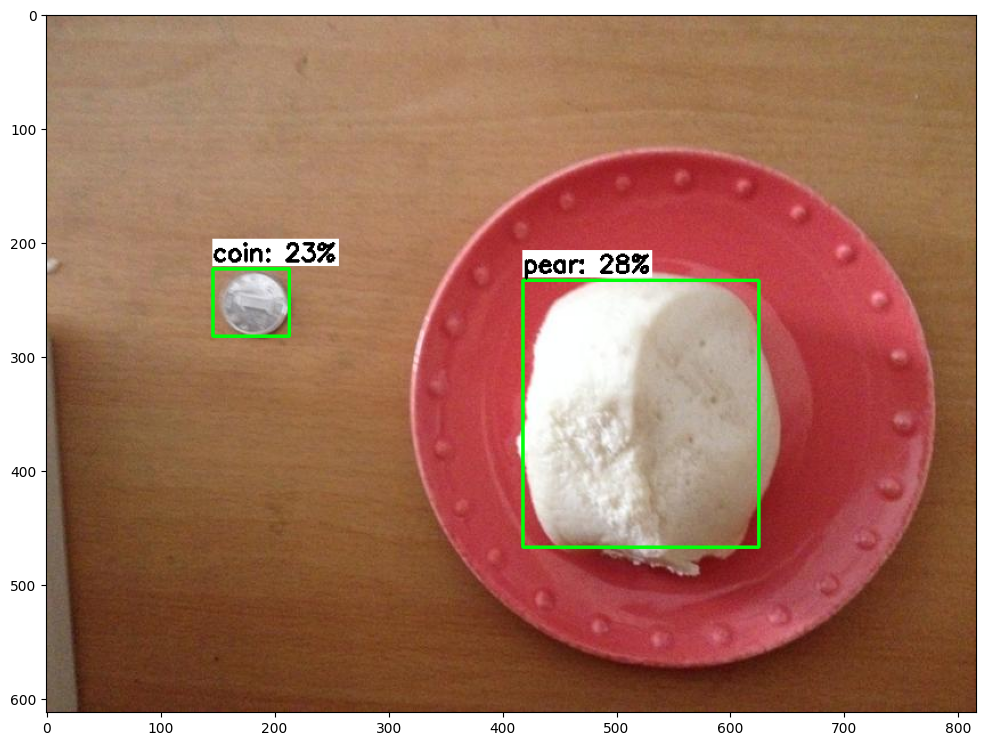

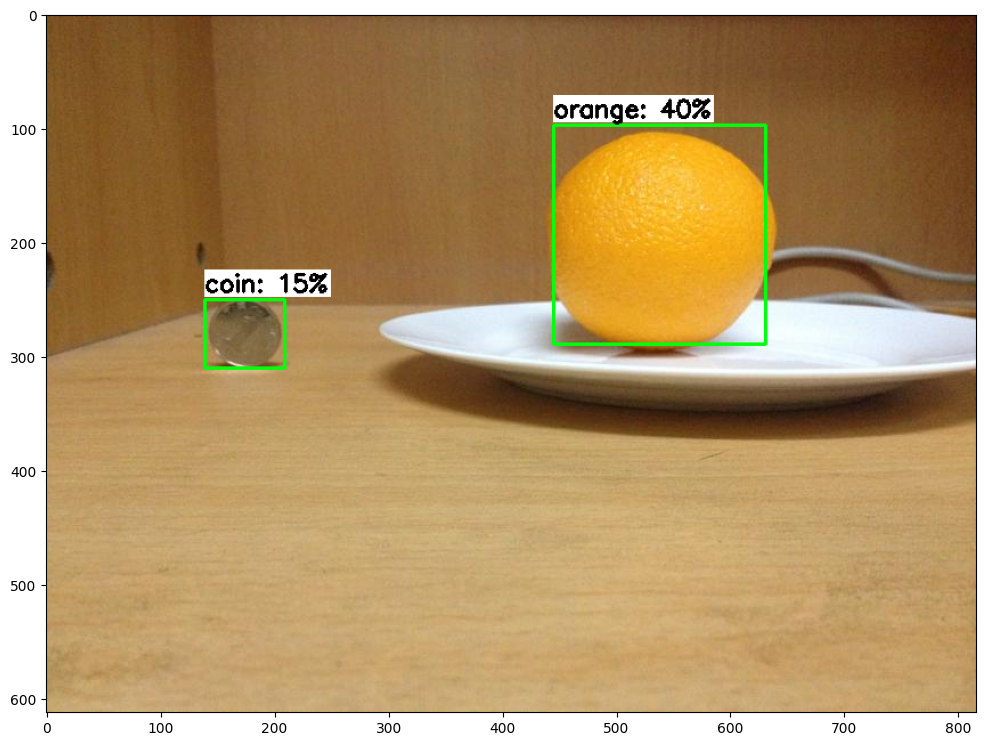

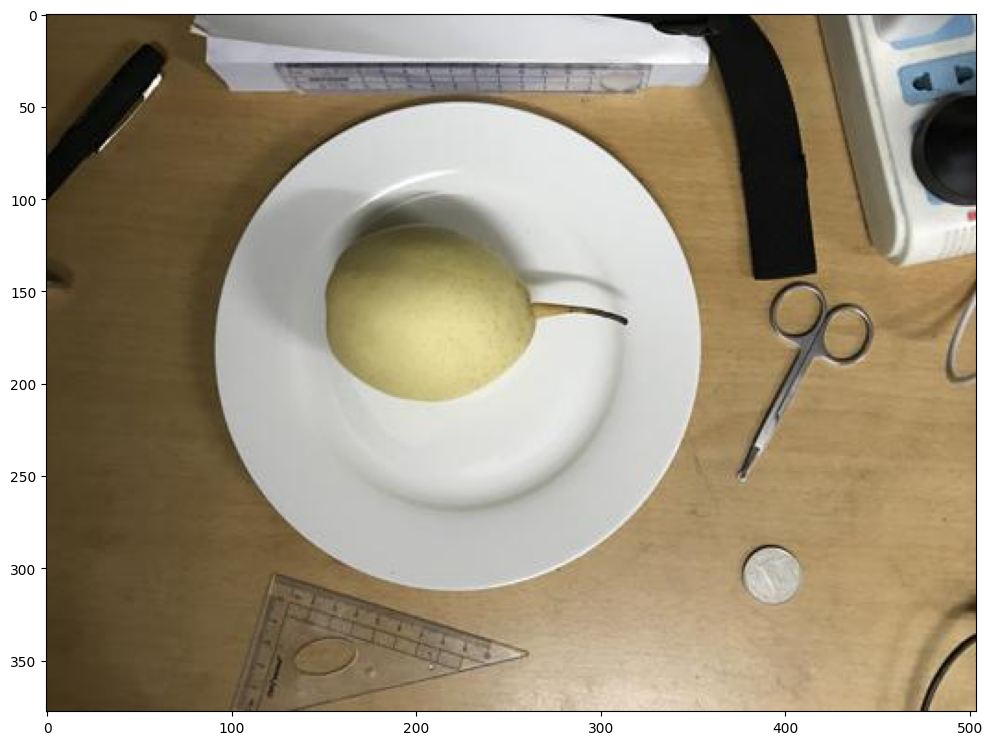

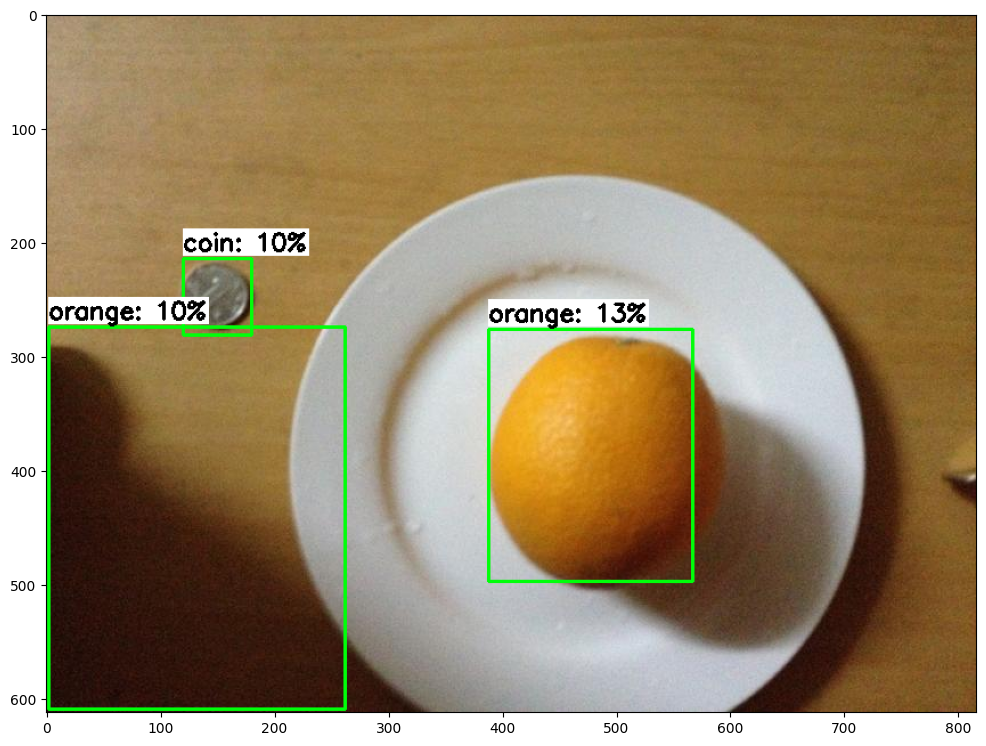

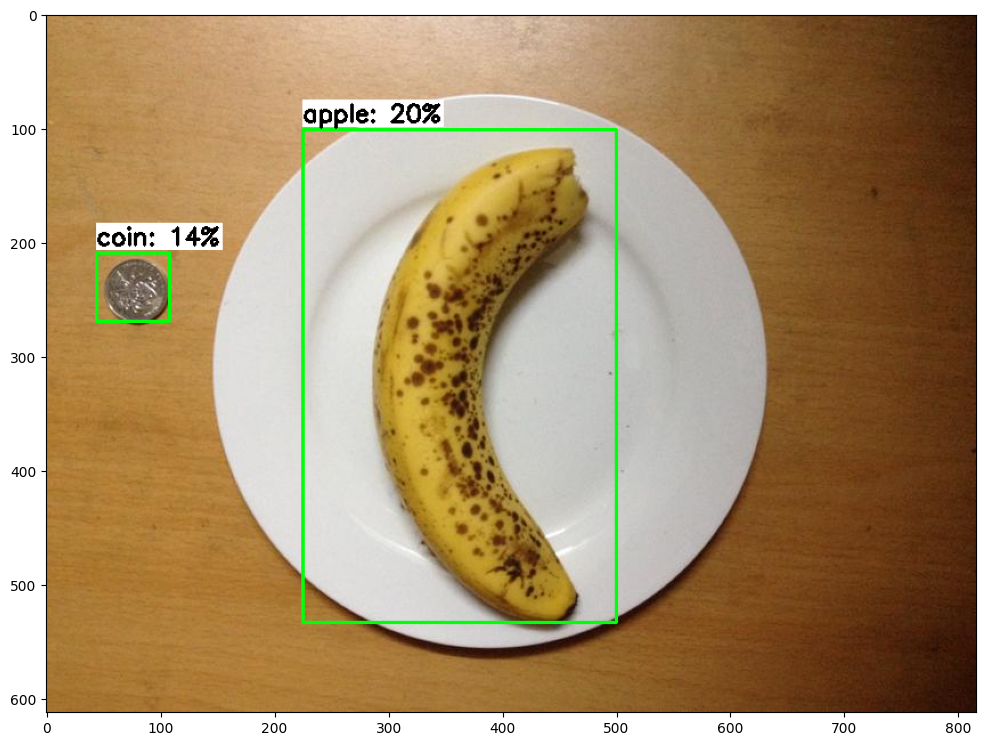

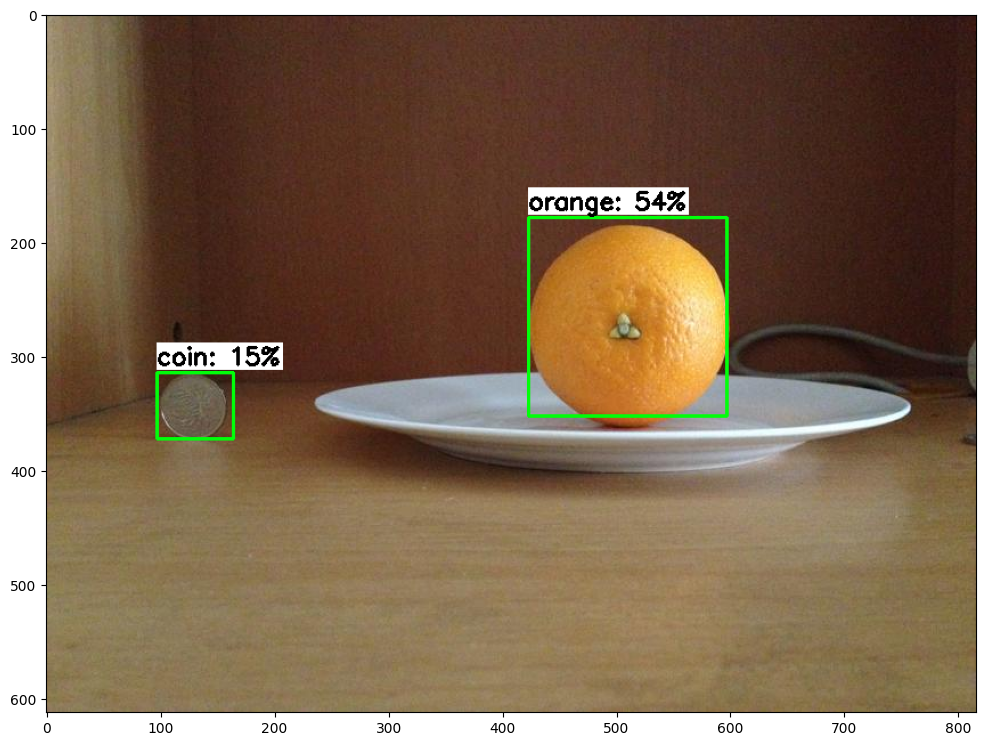

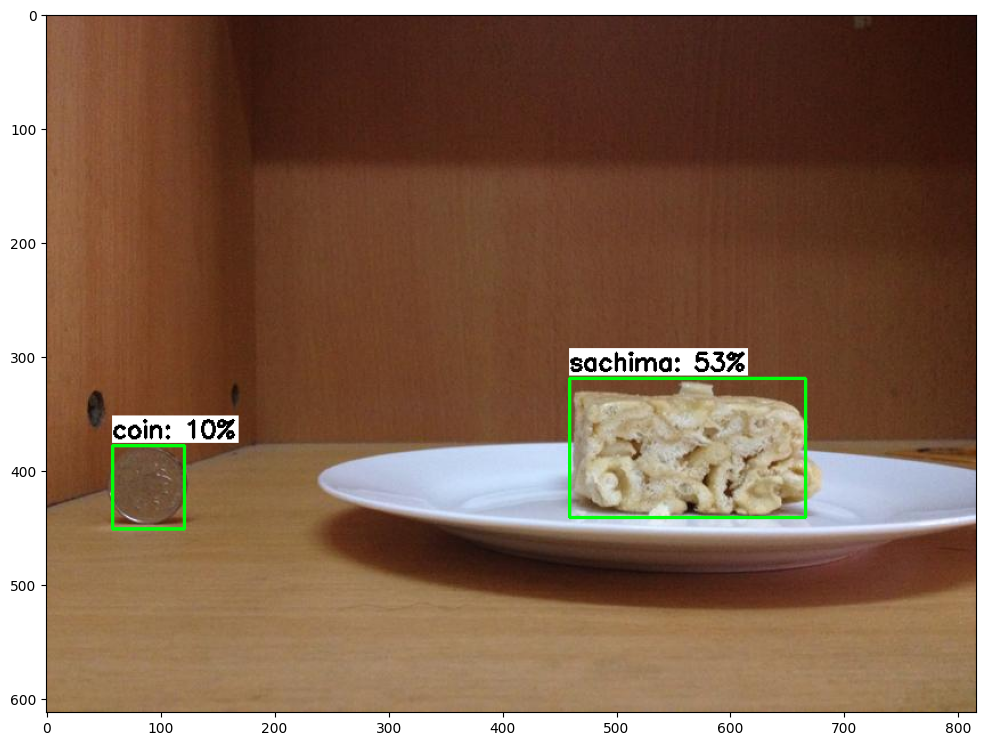

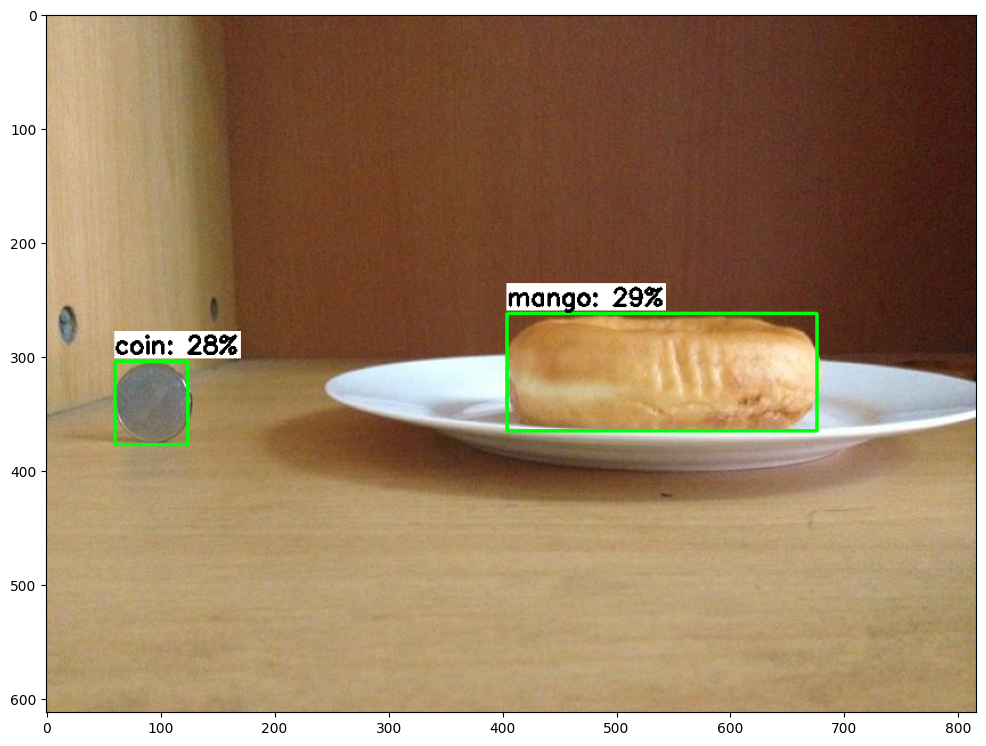

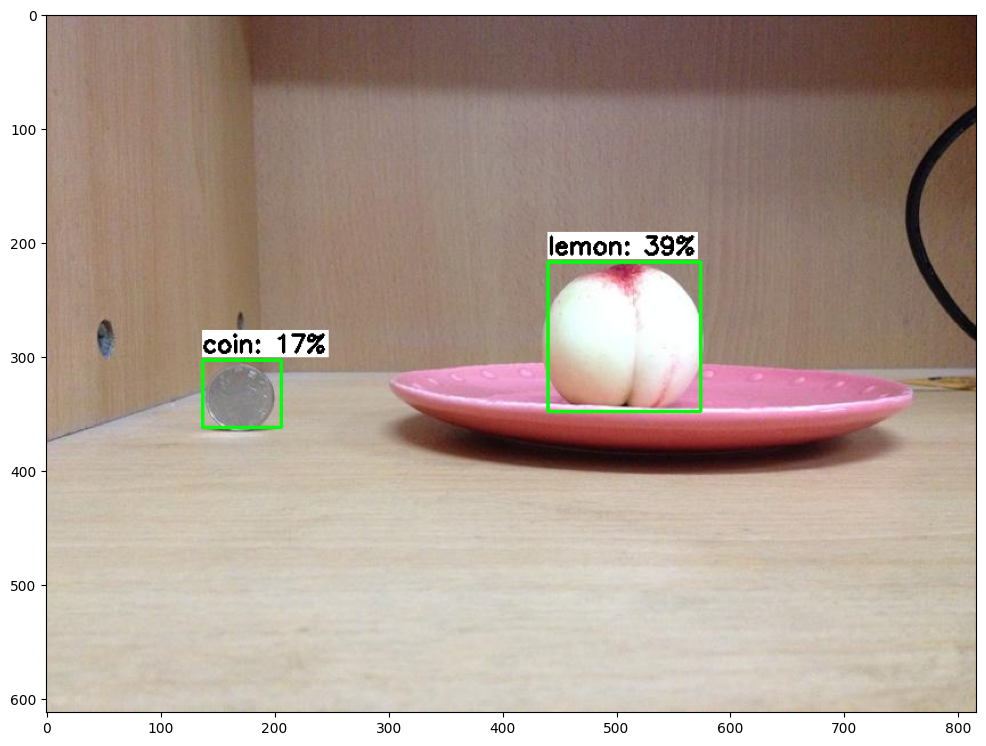

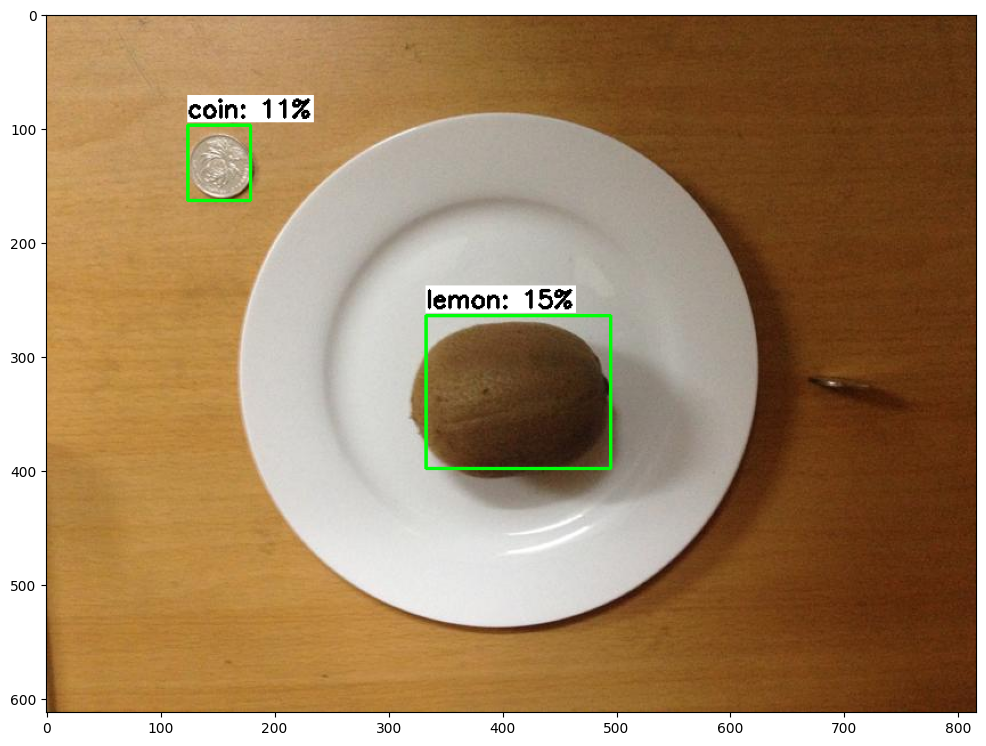

In [ ]:
# Set up variables for running user's model
PATH_TO_IMAGES='/content/images/test'   # Path to test images folder
PATH_TO_MODEL='/content/custom_model_lite/detect.tflite'   # Path to .tflite model file
PATH_TO_LABELS='/content/labelmap.txt'   # Path to labelmap.txt file
min_conf_threshold=0.1   # Confidence threshold (try changing this to 0.01 if you don't see any detection results)
images_to_test = 10   # Number of images to run detection on

# Run inferencing function!
tflite_detect_images(PATH_TO_MODEL, PATH_TO_IMAGES, PATH_TO_LABELS, min_conf_threshold, images_to_test)

#8. Download TFLite Model

We will download this TFLite model, here the following steps \:
1. Copy the labelmap files into the model folder
2. Compress to zip folder
3. Download

Note zip folder contains labelmap.txt and detect.tflite.

In [ ]:
# Move labelmap and pipeline config files into TFLite model folder and zip it up
!cp /content/labelmap.txt /content/custom_model_lite
!cp /content/labelmap.pbtxt /content/custom_model_lite
!cp /content/models/mymodel/pipeline_file.config /content/custom_model_lite

%cd /content
!zip -r custom_model_lite.zip custom_model_lite

/content
  adding: custom_model_lite/ (stored 0%)
  adding: custom_model_lite/labelmap.pbtxt (deflated 72%)
  adding: custom_model_lite/pipeline_file.config (deflated 65%)
  adding: custom_model_lite/detect.tflite (deflated 9%)
  adding: custom_model_lite/labelmap.txt (deflated 31%)
  adding: custom_model_lite/saved_model/ (stored 0%)
  adding: custom_model_lite/saved_model/variables/ (stored 0%)
  adding: custom_model_lite/saved_model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: custom_model_lite/saved_model/variables/variables.index (deflated 78%)
  adding: custom_model_lite/saved_model/assets/ (stored 0%)
  adding: custom_model_lite/saved_model/saved_model.pb (deflated 91%)


In [ ]:
from google.colab import files

files.download('/content/custom_model_lite.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>